# Getting nicer plots

In the previous chapter we saw how to use matplotlib to make quick plots of our data. [Matplotlib](https://matplotlib.org) is a very large plotting library, with many ways of enriching visualizations. In this chapter we're going to look at ways of making better plots with matplotlib, and to replicate the same plots using another plotting library called bokeh. 

There are a few things we can add to our plots to make it more meaningfull and we want all the plots to look the same, so the best thing for us is to define a plotting function and pass all parameters each time we need to plot data. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# define a funtion that returns a matplotlib figure from provided FID data

def plot_data(x=None, y=None, title='', xlabel='', ylabel=''):
    
    if y is None:
        return
    
    # generate matplotlib figure
    fig, ax = plt.subplots()
    
    if x is None:
        ax.plot(y)
    else:
        ax.plot(x, y)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    return fig

At the end of last chapter we saved the FID with the help of the numpy function `savetxt`. Now we need to load it back, and for that we're going to use the numpy function `loadtxt'. 

In [3]:
fid = np.loadtxt('output/my_first_fid.csv', dtype='complex64', delimiter=',')

In [6]:
# aq=8sec, td=8192
t = np.linspace(0.0, 8.0, 8192)

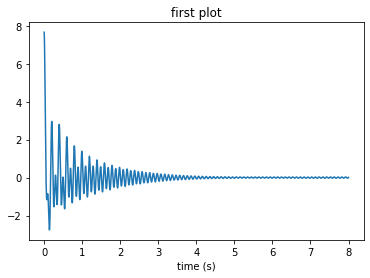

In [30]:
fig0 = plot_data(x=t, y=fid.real, title='first plot', xlabel='time (s)')

## Adding interactivity with Bokeh
[Bokeh](https://bokeh.org) is another very extensive Python plotting library. We'll be using through out the rest of the course to create our final NMR processing and visualization application. The best way to learn a new computational tools is by reading the documentation and going through the tutorials. Here we'll focus on using a subset of options tailored for our specific purpose. You are encouraged to read the user guide [here](https://docs.bokeh.org/en/latest/docs/user_guide.html) 

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource

In [32]:
output_notebook()

Loading BokehJS ...

## Basic plotting
in Bokeh we first need to instantiate a figure object to which we'll be adding different objects, like lines and circles, annotations, etc. Objects that represent data are called glyphs. There are many types of glyphs already defined in bokeh, we'll be using line and circle. You can find more information about basic plotting with glyphs [here](https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html)

So first we create the figure and assign it to the variable `p` 

In [75]:
# create a new plot (with a title) using figure
p = figure(plot_width=800, plot_height=500, title="My First FID")
p

Figure(id='7163', ...)

Then we add a line glyph giving it a line width of 2

In [76]:
# add a line renderer
p.line(t, fid.real, line_width=2)

GlyphRenderer(id='7202', ...)

Finally, we display the visualization with the `show` function

In [73]:
show(p)

As you can see we can get a lot of functionality with just a few lines of code. The toolbar to the right can be customized with many more tools, which is what we'll focus next.

For that, the best thing to do is to define a function that returns a figure object already customized for our needs. 

In [91]:
def bkplot(x=None, y=None, title='', xlabel='', ylabel=''):
    """Returns preconfigured Bokeh figure"""
    
    # list of available tools
    plot_tools = 'pan, box_zoom, ywheel_zoom, box_select, lasso_select, tap,'
    plot_actions = 'undo, redo, reset, save, xzoom_in, xzoom_out,'
    plot_inspectors = 'crosshair, hover, '
    
    plot_options = dict(plot_width=800, plot_height=500, toolbar_location='above', 
                        tools=plot_tools+plot_actions+plot_inspectors)
    
    # instantiate bokeh figure
    fig = figure(title=title, x_axis_label=xlabel, y_axis_label=ylabel, **plot_options)
    
    # remove logo
    fig.toolbar.logo = None
    
    # add a line renderer
    fig.line(t, fid.real, line_width=2)
    
    return fig

In [92]:
fig = bkplot(x=t, y=fid.real, title='My first FID', xlabel='time (s)')
show(fig)

Next up, we'll look into generating basic processing routines 

go [next](03_basic_processing.ipynb) or go [home](00_introduction.ipynb), there's no going [back](01_my_first_fid.ipynb)